In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt


In [2]:
import matplotlib.pyplot as plt

In [3]:
!curl "https://raw.githubusercontent.com/huddasiddique/python/main/data/New_York_City_Leading_Causes_of_Death.csv" -o nyc_death_causes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  106k  100  106k    0     0   818k      0 --:--:-- --:--:-- --:--:--  818k


In [4]:
!curl  "https://raw.githubusercontent.com/huddasiddique/csvpart3/main/data/DOHMH_HIV_AIDS_Annual_Report.csv" -o DOHMH_HIV_AIDS_Annual_Report.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  526k  100  526k    0     0  4050k      0 --:--:-- --:--:-- --:--:-- 4050k


In [5]:
# Dataset: New York City Leading Causes of Death

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/huddasiddique/python/main/data/New_York_City_Leading_Causes_of_Death.csv",)


In [7]:
ha_df = pd.read_csv("https://raw.githubusercontent.com/huddasiddique/csvpart3/main/data/DOHMH_HIV_AIDS_Annual_Report.csv",)

In [8]:
# ha_df.dtypes
print('aids:\n',df.columns.tolist(),'\n')
print('hiv:\n',ha_df.columns.tolist())
#columndf = ha_df[['Year', 'HIV diagnoses', 'HIV diagnosis rate', 'Concurrent diagnoses','AIDS diagnosis rate','Death rate','HIV diagnosis rate']]
merged_df = pd.merge(df, ha_df, how='inner', on=['Year'])
columndf = merged_df[['Age','Year', 'HIV diagnoses', 'HIV diagnosis rate', 'Concurrent diagnoses','AIDS diagnoses','Death rate','HIV diagnosis rate','Age Adjusted Death Rate']]
print('test',columndf)




aids:
 ['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate'] 

hiv:
 ['Year', 'Borough', 'UHF', 'Gender', 'Age', 'Race', 'HIV diagnoses', 'HIV diagnosis rate', 'Concurrent diagnoses', '% linked to care within 3 months', 'AIDS diagnoses', 'AIDS diagnosis rate', 'PLWDHI prevalence', '% viral suppression', 'Deaths', 'Death rate', 'HIV-related death rate', 'Non-HIV-related death rate']
test             Age  Year  HIV diagnoses  HIV diagnosis rate  \
0           All  2014           2749                38.3   
1           All  2014           2177                64.6   
2           All  2014            524                15.0   
3           All  2014             48             99999.0   
4       13 - 19  2014             28                 8.5   
...         ...   ...            ...                 ...   
653339      All  2011              0                 0.0   
653340      All  2011              0                 0.0   
653341      All  2011 

In [9]:
ha_df.dtypes
print(ha_df.dtypes);
columndf.dtypes
columndf.columns = columndf.columns.str.replace(' ', '')


Year                                  int64
Borough                              object
UHF                                  object
Gender                               object
Age                                  object
Race                                 object
HIV diagnoses                         int64
HIV diagnosis rate                  float64
Concurrent diagnoses                  int64
% linked to care within 3 months      int64
AIDS diagnoses                        int64
AIDS diagnosis rate                 float64
PLWDHI prevalence                   float64
% viral suppression                   int64
Deaths                                int64
Death rate                          float64
HIV-related death rate              float64
Non-HIV-related death rate          float64
dtype: object


In [10]:
columndf.head(5)

,Age,Year,HIVdiagnoses,HIVdiagnosisrate,Concurrentdiagnoses,AIDSdiagnoses,Deathrate,HIVdiagnosisrate,AgeAdjustedDeathRate
0,All,2014,2749,38.3,490,1518,10.1,38.3,90.4
1,All,2014,2177,64.6,369,1087,9.8,64.6,90.4
2,All,2014,524,15.0,116,415,10.9,15.0,90.4
3,All,2014,48,99999.0,5,16,8.1,99999.0,90.4
4,13 - 19,2014,28,8.5,1,3,0.0,8.5,90.4


In [11]:
columndf.head(5)

,Age,Year,HIVdiagnoses,HIVdiagnosisrate,Concurrentdiagnoses,AIDSdiagnoses,Deathrate,HIVdiagnosisrate,AgeAdjustedDeathRate
0,All,2014,2749,38.3,490,1518,10.1,38.3,90.4
1,All,2014,2177,64.6,369,1087,9.8,64.6,90.4
2,All,2014,524,15.0,116,415,10.9,15.0,90.4
3,All,2014,48,99999.0,5,16,8.1,99999.0,90.4
4,13 - 19,2014,28,8.5,1,3,0.0,8.5,90.4


In [12]:
print("Year:",columndf.Year.unique().tolist())
print("AIDSdiagnosisrate:",columndf.AIDSdiagnoses.unique().tolist())
print("Concurrentdiagnoses:",columndf.Concurrentdiagnoses.unique().tolist())


print("Total Values:",len(columndf.Deathrate.tolist()))
print(columndf.Deathrate.tolist())


Year: [2014, 2013, 2012, 2011]
AIDSdiagnosisrate: [1518, 1087, 415, 16, 3, 46, 107, 130, 96, 49, 7, 280, 116, 2, 26, 12, 205, 259, 283, 237, 91, 38, 492, 357, 15, 185, 348, 0, 14, 30, 40, 31, 131, 72, 56, 4, 48, 59, 17, 217, 99, 98, 64, 5, 8, 24, 13, 11, 22, 1, 74, 25, 10, 9, 6, 33, 20, 39, 52, 32, 19, 18, 45, 392, 29, 93, 50, 81, 65, 276, 157, 68, 95, 69, 53, 34, 28, 41, 37, 300, 60, 36, 62, 240, 90, 67, 55, 44, 23, 21, 196, 43, 42, 27, 146, 58, 1949, 1440, 486, 114, 141, 303, 164, 328, 338, 378, 254, 122, 681, 462, 243, 427, 137, 77, 57, 54, 290, 151, 127, 63, 76, 47, 472, 149, 105, 73, 323, 214, 71, 35, 89, 78, 66, 70, 425, 94, 344, 123, 102, 51, 282, 61, 221, 80, 2106, 1529, 544, 181, 139, 376, 330, 364, 397, 136, 716, 488, 277, 470, 168, 82, 302, 134, 88, 101, 99999, 573, 178, 129, 395, 247, 160, 111, 85, 434, 358, 138, 75, 209, 87, 2366, 1712, 622, 133, 210, 421, 191, 370, 405, 506, 305, 822, 570, 274, 568, 203, 84, 79, 365, 156, 124, 650, 201, 155, 103, 449, 106, 119, 500, 92, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
for i in columndf.Year.unique().tolist():
    dfA = columndf[columndf.Year == i ]
    i = int(i)
  
    print(f"Years {i} yearcount:",len(dfA))

Years 2014 yearcount: 163336
Years 2013 yearcount: 159733
Years 2012 yearcount: 160934
Years 2011 yearcount: 169341


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


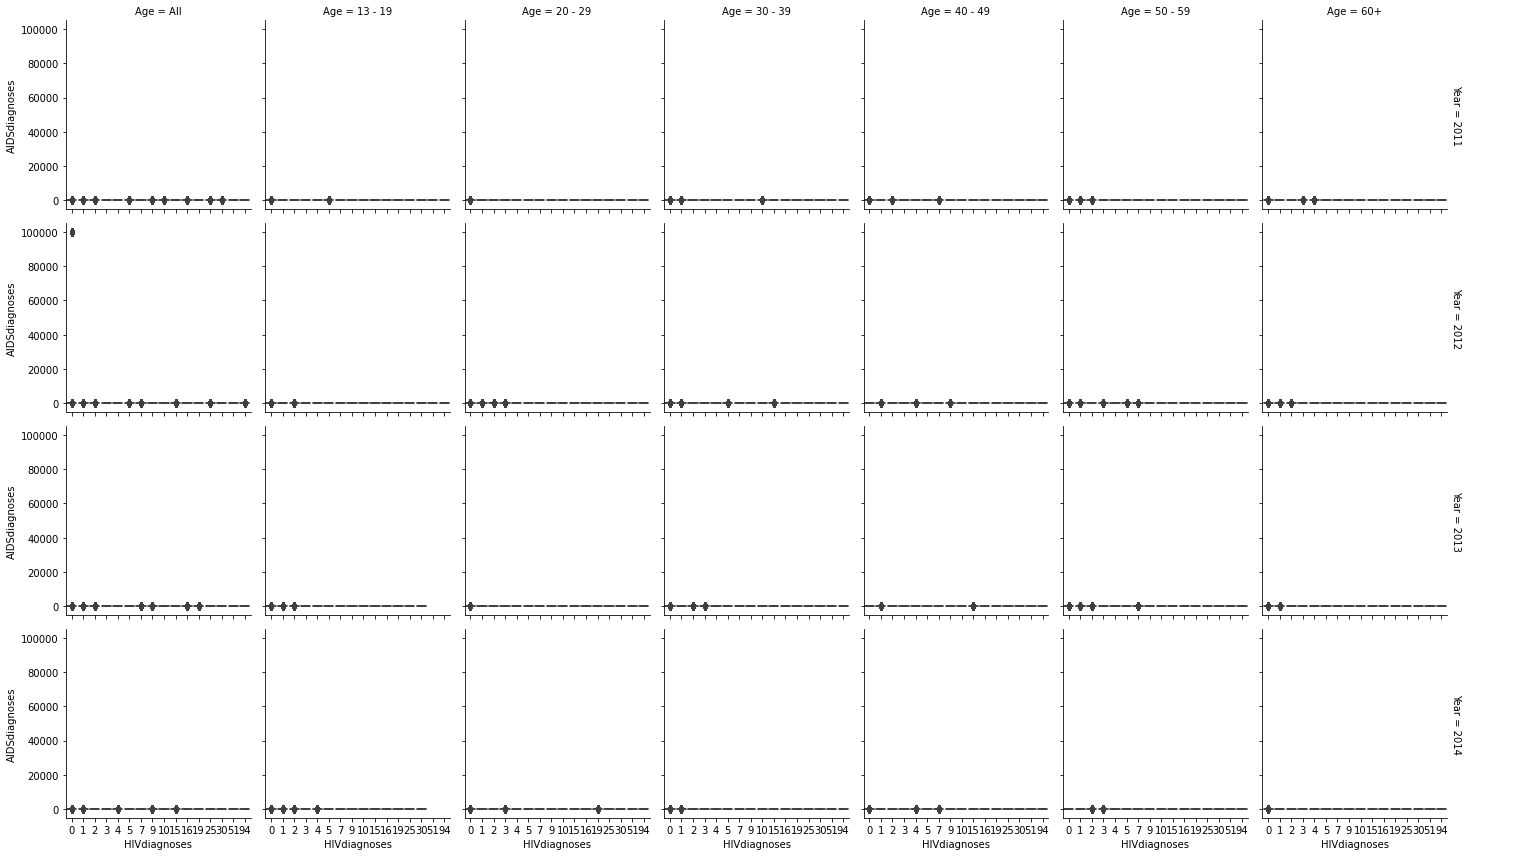

In [14]:
graph = sns.FacetGrid(data=columndf, col = "Age",row='Year', margin_titles = True)
print(graph)
graph.map(sns.boxplot,"HIVdiagnoses", "AIDSdiagnoses")
graph.add_legend()

In [15]:
for year in columndf.Year.unique().tolist():
    dfB = columndf[columndf.Year == year]
    mean_hiv =  dfB.HIVdiagnoses.mean()
    mean_aids =   dfB.AIDSdiagnoses.mean()
    print(f"{year}\nHIVdiagnoses  {mean_hiv} \nAIDSdiagnoses {mean_aids}")

2014
HIVdiagnoses  25.002497918401332 
AIDSdiagnoses 13.478767693588676
2013
HIVdiagnoses  25.815154038301415 
AIDSdiagnoses 17.348875936719402
2012
HIVdiagnoses  28.016652789342213 
AIDSdiagnoses 102.25978351373855
2011
HIVdiagnoses  30.564529558701082 
AIDSdiagnoses 21.548709408825978


In [16]:
test_diagnoses = columndf.groupby(['Year'])
for y in sorted(columndf.Year.unique().tolist()):
    dfB = columndf[columndf.Year == y]
    HIVdiagnoses = dfB.HIVdiagnoses.sum()
    AIDSdiagnoses = dfB.AIDSdiagnoses.sum()
    print(f'{y}\'s HIVdiagnoses: {HIVdiagnoses}')
    print(f'{y}\'s AIDSdiagnoses: {AIDSdiagnoses}\n')

2011's HIVdiagnoses: 5175828
2011's AIDSdiagnoses: 3649080

2012's HIVdiagnoses: 4508832
2012's AIDSdiagnoses: 16457076

2013's HIVdiagnoses: 4123532
2013's AIDSdiagnoses: 2771188

2014's HIVdiagnoses: 4083808
2014's AIDSdiagnoses: 2201568



<ipython-input-17-75103fcce5f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columndf["compared_to_hivdiagnoses"] = columndf.HIVdiagnoses.apply(compare_hiv_mean)
<ipython-input-17-75103fcce5f4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columndf["compared_to_aidsdiagnoses"] = columndf.AIDSdiagnoses.apply(compare_aids_mean)


HIV Score: 27.38526717931136 
Aids Score: 38.38546309448009 
higher than HIV scores: 15.41%
lower than HIV scores: 84.59%
higher than Aids scores: 8.4%
lower than Aids scores: 91.6%


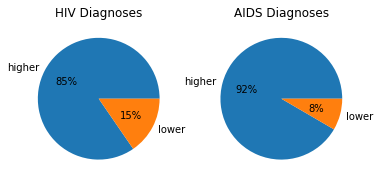

In [17]:


# * Display information of average score of a Age level of Year within a time period in relation to the average score
def testing():



    # * Calculate 
    hivdiagnoses = columndf.HIVdiagnoses.mean()
    aidsdiagnoses = columndf.AIDSdiagnoses.mean()
    compare_hiv_mean = lambda x: "higher" if x>hivdiagnoses else "lower"
    compare_aids_mean = lambda x: "higher" if x>aidsdiagnoses else "lower"
    columndf["compared_to_hivdiagnoses"] = columndf.HIVdiagnoses.apply(compare_hiv_mean)
    columndf["compared_to_aidsdiagnoses"] = columndf.AIDSdiagnoses.apply(compare_aids_mean)

    # *
    hiv_higher_percentage = round((len(columndf[columndf.compared_to_hivdiagnoses == 'higher'])/len(columndf) * 100),2) 
    hiv_lower_percentage = round((len(columndf[columndf.compared_to_hivdiagnoses == 'lower'])/len(columndf) * 100),2) 
    aids_higher_percentage = round((len(columndf[columndf.compared_to_aidsdiagnoses == 'higher'])/len(columndf) * 100),2) 
    aids_lower_percentage = round((len(columndf[columndf.compared_to_aidsdiagnoses == 'lower'])/len(columndf) * 100),2) 
    print(f'HIV Score: {hivdiagnoses} ')
    print(f'Aids Score: {aidsdiagnoses} ')
    print(f"higher than HIV scores: {hiv_higher_percentage}%")
    print(f"lower than HIV scores: {hiv_lower_percentage}%")
    print(f"higher than Aids scores: {aids_higher_percentage}%")
    print(f"lower than Aids scores: {aids_lower_percentage}%")

    
    hiv_data = columndf.compared_to_hivdiagnoses.value_counts().tolist()
    aids_data = columndf.compared_to_aidsdiagnoses.value_counts().tolist()
    hiv_total_values = len(hiv_data)
    aids_total_values = len(aids_data)
    hiv_data = [point/hiv_total_values for point in hiv_data]
    aids_data = [point/aids_total_values for point in aids_data]
    hiv_label = columndf.compared_to_hivdiagnoses.unique().tolist()
    aids_label = columndf.compared_to_aidsdiagnoses.unique().tolist()

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].pie(hiv_data,labels=hiv_label,autopct='%.0f%%')
    axs[0].set_title("HIV Diagnoses")
    axs[1].pie(aids_data,labels=aids_label,autopct='%.0f%%')
    axs[1].set_title("AIDS Diagnoses")
    plt.show()
    

testing()